# Verra Carbon Analysis

## Setup

### Declare some information

In [225]:
# This lets python create graphs
import matplotlib.pyplot as plt

# This lets python read spreadsheets 
import csv

# This lets python read dates
import datetime

# This is the spreadsheet in row major order
table_row_major : list = [ ]

# This is the spreadsheet in column major order
table_column_major : list = [ ]

# This is the spreadsheet in row major order, with only United States
united_states_table_row_major : list = []

# This is the spreadsheet in column major order, with only United States
united_states_table_column_major : list = []

# This is the quantity of rows in the spreadsheet
table_row_count : int = 0

# This is the quantity of columns in the spreadsheet
table_column_count : int = 0

united_states_table_row_count : int = 0
united_states_table_column_count : int = 0

# This is what each column stores
column_identifiers : list = [
    "ID",
    "Name",
    "Proponent",
    "Project Type",
    "AFOLU Activities",
    "Methodology",
    "Status",
    "Country/Area",
    "Estimated Annual Emission Reductions",
    "Region",
    "Project Registration Date",
    "Crediting Period Start Date",
    "Crediting Period End Date"
]

# This is the set of unique elements in each column
unique_column_elements : list = [ ]

# This is the quantity of unique elements in each column
unique_column_elements_count : list = [ ]

### Make the table

In [226]:
# This part of the code creates a table from the spreadsheet 

# Open the spreadsheet
with open('allprojects.csv') as csv_file:

    # Parse the spreadsheet
    csv_reader = csv.reader(csv_file, delimiter=',')

    # For each row in the spreadsheet ...
    for row in csv_reader:

        # ... add the row to the table
        table_row_major.append(list(row))

# Update the row count
table_row_count = len(table_row_major)

# Update the column count
table_column_count = len(table_row_major[0])

# Create a column major table from the row major table
for column in range(table_column_count):
    
    # Declare a list for the column
    column_list : list = [ ]

    # For each column of each row ...
    for row in range(table_row_count):

        # ... add the cell to the list of column cells
        column_list.append(table_row_major[row][column])

    # Store the column
    table_column_major.append(column_list)

# Make a US only table in row major order
for row in table_row_major:
    if row[7] == 'United States':
        united_states_table_row_major.append(row)

united_states_table_row_count = len(united_states_table_row_major)
united_states_table_column_count = len(united_states_table_row_major[0])

# Make a US only table in column major order
for column in range(united_states_table_column_count):

    column_list : list = [ ]

    for row in range(united_states_table_row_count):
        column_list.append(united_states_table_row_major[row][column])
    
    united_states_table_column_major.append(column_list)

## Filters

### TODO


In [227]:
table_column_major = united_states_table_column_major

## Statistics

In [228]:
# This part of the code computes statistics about the dataset

# For each column
for c in range(table_column_count):

    # Remove duplicates from the column
    unique_column_elements.append(set(table_column_major[c]))

    # Count the number of unique items in the column
    unique_column_elements_count.append(len(set(table_column_major[c])))

### All

In [229]:
# This outputs a lot of data 

for i in range(table_column_major[4].count('')):
    table_column_major[4].remove('')
    
# Fix errors in status
#unique_column_elements[6].remove('Status')

# Fix Estimated Annual Emissions
#for i in range(table_column_major[8].count('Estimated Annual Emission Reductions')):
#    table_column_major[8].remove('Estimated Annual Emission Reductions')

# Fix errors in Region
unique_column_elements[9].remove('')
#unique_column_elements[9].remove('Region')

# Fix errors in Project registration date
#unique_column_elements[10].remove('Project Registration Date')
#table_column_major[10].remove('Project Registration Date')

for i in range(table_column_major[10].count('')):
    table_column_major[10].remove('')

# For each column in the table ...
for C in range(table_column_count):

    # ... print the name of the column, and the number of unique cells in said column ...
    print(f"\n\nVerra data set has {unique_column_elements_count[C]} unique {column_identifiers[C]}(s):")

    # ... then print each unique cell
    for c in sorted(unique_column_elements[C]):
        print(f" - {c}")




Verra data set has 154 unique ID(s):
 - 1017
 - 1030
 - 1036
 - 1048
 - 1054
 - 1060
 - 1087
 - 1089
 - 1116
 - 1119
 - 1165
 - 13
 - 1305
 - 1306
 - 1354
 - 1367
 - 1373
 - 1374
 - 1375
 - 1376
 - 1377
 - 1379
 - 138
 - 1383
 - 1386
 - 14
 - 1407
 - 1415
 - 1436
 - 15
 - 1527
 - 1528
 - 1533
 - 1548
 - 16
 - 161
 - 1666
 - 167
 - 1675
 - 1680
 - 1681
 - 17
 - 1754
 - 1802
 - 1808
 - 1810
 - 1849
 - 1888
 - 1911
 - 1929
 - 1960
 - 1988
 - 2073
 - 2240
 - 2259
 - 2360
 - 2414
 - 2486
 - 2495
 - 2535
 - 2563
 - 2761
 - 288
 - 290
 - 2985
 - 2997
 - 3003
 - 3015
 - 3019
 - 3094
 - 317
 - 318
 - 3207
 - 3221
 - 3300
 - 3301
 - 3302
 - 3331
 - 3351
 - 3352
 - 3598
 - 3616
 - 3634
 - 3656
 - 3735
 - 3745
 - 3814
 - 3839
 - 388
 - 3918
 - 3925
 - 3996
 - 4018
 - 4029
 - 4090
 - 4207
 - 4236
 - 4242
 - 4268
 - 440
 - 441
 - 442
 - 4441
 - 448
 - 4495
 - 450
 - 4546
 - 4547
 - 466
 - 4660
 - 468
 - 5
 - 50
 - 559
 - 569
 - 573
 - 613
 - 618
 - 632
 - 634
 - 638
 - 640
 - 642
 - 648
 - 684
 - 

### IDs

### Names

### Proponents

### Project Types

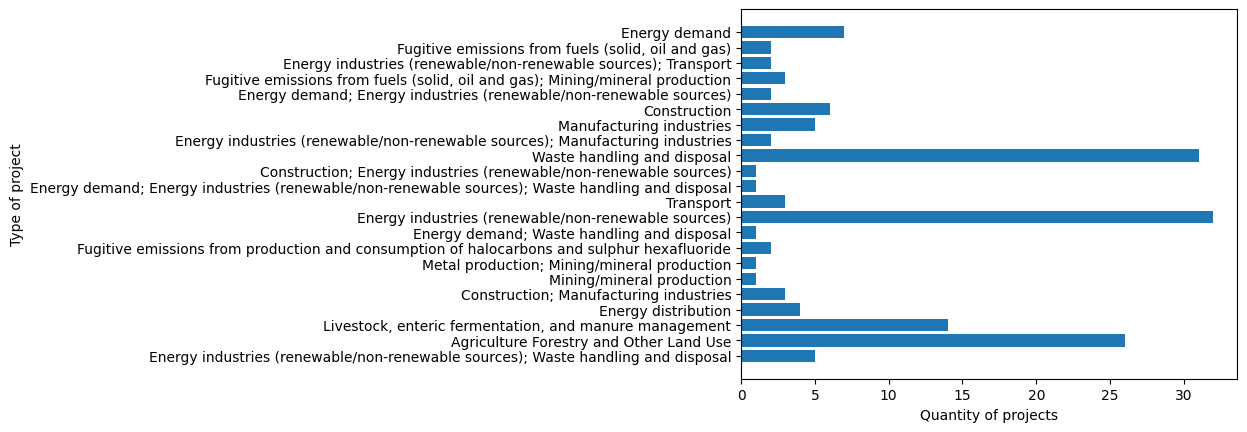

In [230]:
# Make a bar chart for the quantity of statuses of each project
regions : list = list(unique_column_elements[3])
region_count : list = [ ]

for r in range(len(regions)):
    z = table_column_major[3].count(regions[r])
    region_count.append(z)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Type of project")

# Create a horizontal bar graph
plt.barh(width=region_count, y=regions)

# Show it
plt.show()

### AFOLU Activities

### Methodologies

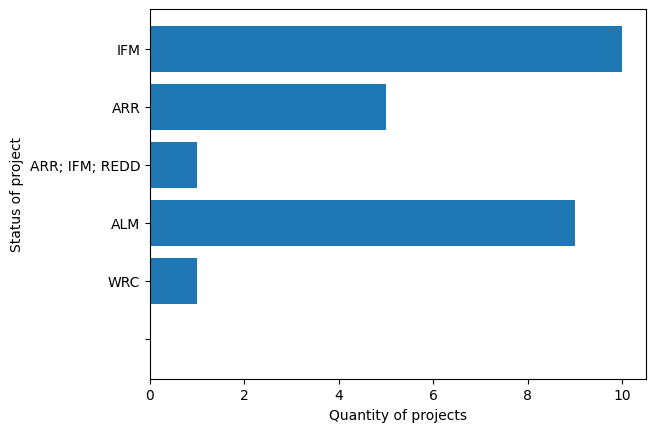

In [231]:
# Make a bar chart for the quantity of statuses of each project
regions : list = list(unique_column_elements[4])
region_count : list = [ ]

for r in range(len(regions)):
    z = table_column_major[4].count(regions[r])
    region_count.append(z)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Methodology")

# Create a horizontal bar graph
plt.barh(width=region_count, y=regions)

# Show it
plt.show()

### Statuses

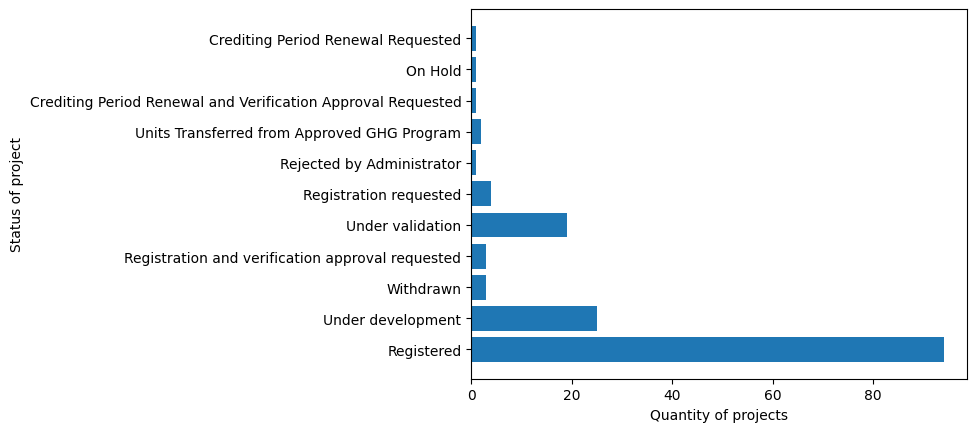

In [232]:
# Make a bar chart for the quantity of statuses of each project
regions : list = list(unique_column_elements[6])
region_count : list = [ ]

for r in range(len(regions)):
    z = table_column_major[6].count(regions[r])
    region_count.append(z)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Status of project")

# Create a horizontal bar graph
plt.barh(width=region_count, y=regions)

# Show it
plt.show()

### Countries

In [233]:
# Make a bar chart for the quantity of projects in each region
#regions : list = list(unique_column_elements[9])
#region_count : list = [ ]

#for r in range(len(regions)):
#    z = table_column_major[9].count(regions[r])
#    region_count.append(z)

# Set the X axis label
#plt.xlabel("Quantity of projects")

# Set the Y axis label
#plt.ylabel("Region")

# Create a horizontal bar graph
#plt.barh(width=region_count, y=regions)

# Show it
#plt.show()

### Estimated Annual Emission Reductions

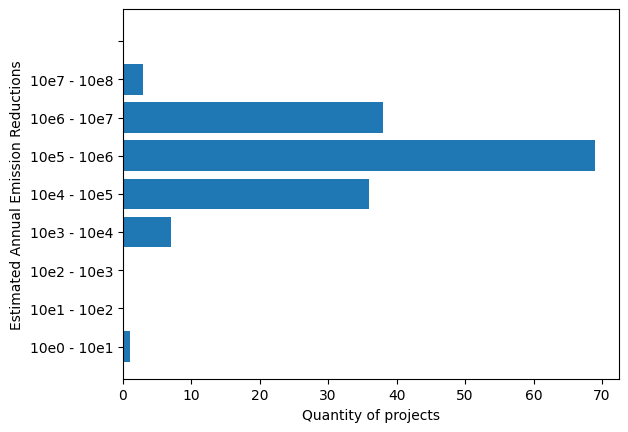

In [234]:
# Make a bar chart for project registration year
est_annual_emission_reductions : list = table_column_major[8]
eaer_buckets : list = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
for eaer in est_annual_emission_reductions:
    eaerc : int = 0
    eaerc = 0
    teaer : int = 0
    teaer = int(eaer)
    while teaer > 1:
        eaerc+=1
        teaer = teaer / 10
    eaer_buckets[eaerc]+=1

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Estimated Annual Emission Reductions")

# Create a horizontal bar graph
plt.barh(y=["10e0 - 10e1", "10e1 - 10e2", "10e2 - 10e3", "10e3 - 10e4", "10e4 - 10e5", "10e5 - 10e6", "10e6 - 10e7", "10e7 - 10e8", "", ""], width=eaer_buckets)

# Show it
plt.show()

### Region

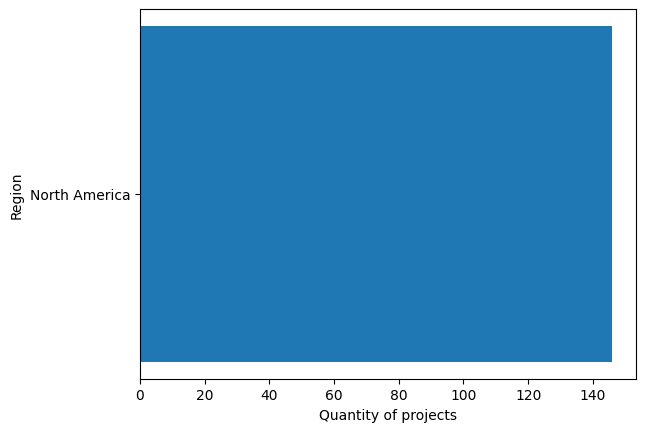

In [235]:
# Make a bar chart for the quantity of projects in each region
regions : list = list(unique_column_elements[9])
region_count : list = [ ]

for r in range(len(regions)):
    z = table_column_major[9].count(regions[r])
    region_count.append(z)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Region")

# Create a horizontal bar graph
plt.barh(width=region_count, y=regions)

# Show it
plt.show()

### Project Registration Date

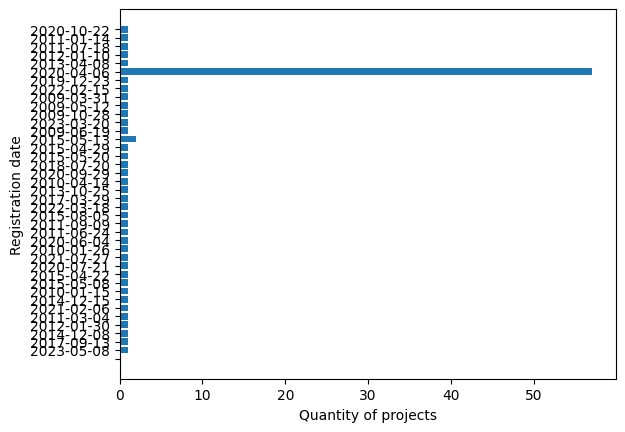

In [236]:
# Make a bar chart for project registration date
regions : list = list(unique_column_elements[10])
region_count : list = [ ]

for r in range(len(regions)):
    z = table_column_major[10].count(regions[r])
    region_count.append(z)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Registration date")

# Create a horizontal bar graph
plt.barh(width=region_count, y=regions)

# Show it
plt.show()


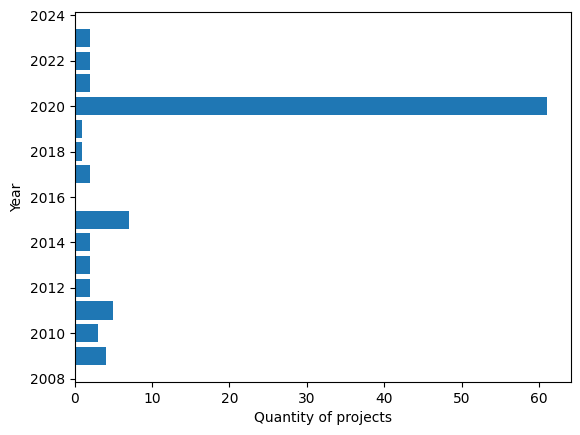

In [237]:
# Make a bar chart for project registration year
ryr_dates_m : list = table_column_major[10]
ryr_date_month : list = [ ]
ryr_date_count_year : list = [ ]
ryr_date_ctr_month : list = [ ]

for r in range(len(ryr_dates_m)):
    dty = datetime.datetime.strptime(ryr_dates_m[r], "%Y-%m-%d")
    ryr_date_month.append(dty.year)

ryr_date_count_month = list(sorted(set(ryr_date_month)))

for i, y in enumerate(ryr_date_count_month):
    ryr_date_ctr_month.append(ryr_date_month.count(y))

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Year")

# Create a horizontal bar graph
plt.barh(width=ryr_date_ctr_month, y=ryr_date_count_month)

# Show it
plt.show()

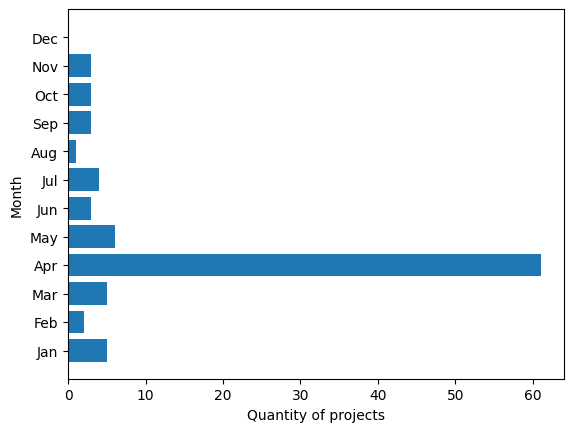

In [238]:
# Make a bar chart for project registration month
ryr_dates_m : list = table_column_major[10]
ryr_date_month : list = [ ]
ryr_date_count_year : list = [ ]
ryr_date_ctr_month : list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

for r in range(len(ryr_dates_m)):
    dty = datetime.datetime.strptime(ryr_dates_m[r], "%Y-%m-%d")
    ryr_date_month.append(dty.month)

ryr_date_count_month = list(sorted(set(ryr_date_month)))

for i, y in enumerate(ryr_date_count_month):
    ryr_date_ctr_month[i]=ryr_date_month.count(y)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Month")

# Create a horizontal bar graph
plt.barh(width=ryr_date_ctr_month, y=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

# Show it
plt.show()

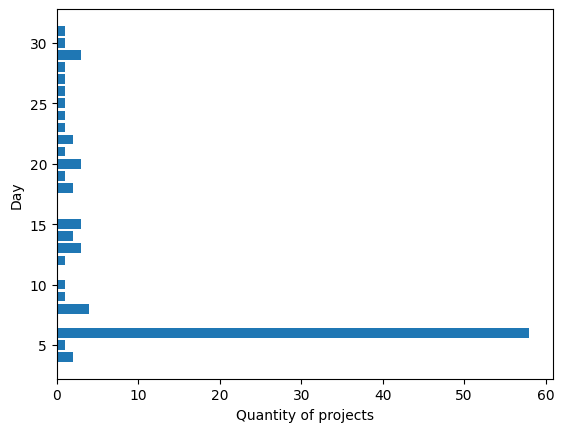

In [239]:
# Make a bar chart for project registration day of the month
ryr_dates_m : list = table_column_major[10]
ryr_date_month : list = [ ]
ryr_date_count_year : list = [ ]
ryr_date_ctr_month : list = [ ]

for r in range(len(ryr_dates_m)):
    dty = datetime.datetime.strptime(ryr_dates_m[r], "%Y-%m-%d")
    ryr_date_month.append(dty.day)

ryr_date_count_month = list(sorted(set(ryr_date_month)))

for i, y in enumerate(ryr_date_count_month):
    ryr_date_ctr_month.append(ryr_date_month.count(y))

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Day")

# Create a horizontal bar graph
plt.barh(width=ryr_date_ctr_month, y=ryr_date_count_month)

# Show it
plt.show()

### Crediting Period Start Date

### Crediting Period End Date